In [1]:
#Regression tree 
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
                                                  

In [2]:
data_for_model = pickle.load(open(r"C:\Users\19144\OneDrive\Desktop\Data Science Infinity\Python Fundamentals\Pickle files\abc_regression_modeling.p", "rb")) #rb for reading a file in


In [3]:
data_for_model

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,524,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,607,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,343,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,322,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...,...
862,4,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,372,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,104,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,373,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [4]:
data_for_model.drop("customer_id", axis=1, inplace=True) #True so that it is applied


In [5]:
data_for_model

,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800
...,...,...,...,...,...,...,...,...,...
862,2.14,M,0.64,0.564,3499.39,278,47,5,74.455106
865,4.38,F,0.50,0.321,3423.01,338,49,5,69.857347
866,2.36,F,0.63,0.587,3648.08,280,49,5,74.450612
868,0.21,M,0.47,0.972,3303.80,264,51,5,64.780392


In [6]:
#Shuffle data
#Best practice step
#This aids us in being sensitive to how data is organized - it may or may not have an impact on the model itself
data_for_model = shuffle(data_for_model, random_state=42)

In [7]:
#Dealing with missing values
data_for_model.isna().sum()

distance_from_store       2
gender                    3
credit_score              2
customer_loyalty_score    0
total_sales               0
total_items               0
transaction_count         0
product_area_count        0
average_basket_value      0
dtype: int64

In [8]:
data_for_model.dropna(how = "any", inplace=True) #If any missing values, then whole row is dropped, True so that it is applied

In [9]:
#Deal with outliers
outlier_investigation = data_for_model.describe()

In [10]:
outlier_investigation

,distance_from_store,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,2.021041,0.596117,0.509589,1846.502538,278.304569,44.926396,4.312183,36.781487
std,2.566045,0.101352,0.294504,1767.829482,214.236424,21.248012,0.725054,19.337336
min,0.000000,0.260000,0.002000,45.950000,10.000000,4.000000,2.000000,9.342000
25%,0.710000,0.530000,0.263000,942.067500,201.000000,41.000000,4.000000,22.406953
50%,1.645000,0.590000,0.510500,1471.490000,258.500000,50.000000,4.000000,30.365417
75%,2.910000,0.660000,0.771500,2104.727500,318.500000,53.000000,5.000000,47.208474
max,44.370000,0.880000,1.000000,9878.760000,1187.000000,109.000000,5.000000,102.335417


In [11]:
data_for_model

,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
455,0.28,M,0.81,0.889,990.65,243,53,4,18.691509
621,2.58,F,0.58,0.162,333.26,70,13,4,25.635385
64,0.80,M,0.80,0.956,1753.96,371,52,5,33.730000
456,0.16,M,0.56,0.926,929.57,225,51,4,18.226863
196,3.27,F,0.67,0.297,1904.55,376,36,3,52.904167
...,...,...,...,...,...,...,...,...,...
146,1.34,M,0.57,0.690,1682.14,364,47,4,35.790213
226,1.85,M,0.63,0.242,1787.61,196,53,5,33.728491
588,1.53,F,0.54,0.324,1173.84,193,55,5,21.342545
771,2.28,F,0.45,0.079,70.67,23,4,3,17.667500


In [12]:
#Split input variables and output variables
X = data_for_model.drop(["customer_loyalty_score"], axis=1)
y = data_for_model["customer_loyalty_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
#Deal with categorical variables
categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse=False, drop="first") #Drop first encoded column to avoid dummy trap

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars]) #Want to use fit transform on training data, but transform only on test data 
#Want encoding rules learned on training, and then applied on testing - rules will remain the same
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars]) 

encoder_feature_names = one_hot_encoder.get_feature_names_out(input_features=categorical_vars)

# Run for x_train
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_train.drop(categorical_vars, axis=1, inplace=True)

# Run for x_test
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)
X_test.drop(categorical_vars, axis=1, inplace=True)


C:\Users\19144\anaconda4\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
data_for_model["gender"]

455    M
621    F
64     M
456    M
196    F
      ..
146    M
226    M
588    F
771    F
219    F
Name: gender, Length: 394, dtype: object

In [15]:
#Model Training

regressor = DecisionTreeRegressor(random_state = 42,  max_depth = 4)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [16]:
#Predict on the Test Set
y_pred = regressor.predict(X_test)

In [17]:
#Calculate R-Square
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.8666832224200037


In [18]:
#Cross Validation
#Regression
#We might need to shuffle the data and a random state together
cv = KFold(n_splits = 4, shuffle = True, random_state=42)
cv_scores = cross_val_score(regressor, X_train, y_train, cv=cv, scoring = "r2")
#cv=cv
# Print individual scores for each fold
for i, score in enumerate(cv_scores, start=1):
    print(f"CV Fold {i} Score: {score:.4f}")

print(f"CV Fold Mean Score : {cv_scores.mean()}")


CV Fold 1 Score: 0.7133
CV Fold 2 Score: 0.8080
CV Fold 3 Score: 0.8600
CV Fold 4 Score: 0.8374
CV Fold Mean Score : 0.8046471635623549


In [19]:
#Calculate Adjusted R-square
num_data_points, num_input_vars = X_test.shape

In [20]:
num_data_points #74 rows in test set

79

In [21]:
num_input_vars #8 columns in test set 

8

In [22]:
adjusted_r_squared = 1 - (1- r_squared) * (num_data_points - 1) / (num_data_points - num_input_vars -1)
print(adjusted_r_squared)

0.8514470192680041


In [23]:
#A Demonstration of overfitting
y_pred_training = regressor.predict(X_train)
r2_score(y_train, y_pred_training)
#How precisely is it fitting to training data
#We have 1 - it is perfectly predicting on training set


0.9059473785182592

In [24]:
#Finding the best max_depth
max_depth_list = list(range(1,9))

In [25]:
accuracy_scores = []

for depth in max_depth_list:
    regressor = DecisionTreeRegressor(max_depth = depth, random_state=42)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    accuracy = r2_score(y_test,y_pred)
    accuracy_scores.append(accuracy)

In [26]:
accuracy_scores

[0.48041516747913704,
 0.749628862008641,
 0.8434993278383679,
 0.8666832224200037,
 0.8909700995376669,
 0.8905579006885826,
 0.8990238112614182,
 0.8941316438857448]

In [27]:
#Max depth for 1 was low = .48
#Seems to flat line around .89 - similar to R2


In [28]:
max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_idx]

In [29]:
optimal_depth

7

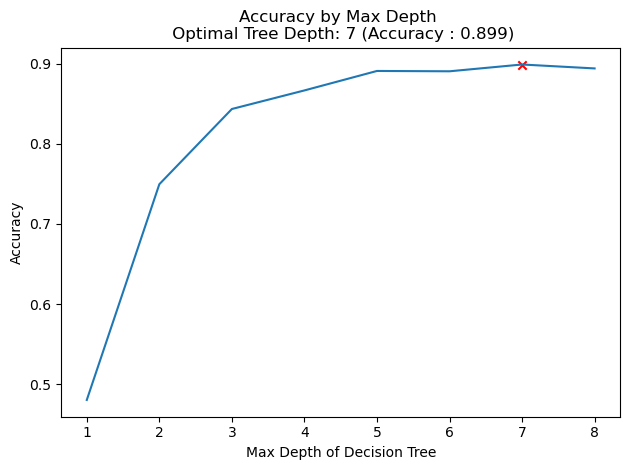

In [30]:
#plot of max depths
plt.plot(max_depth_list,accuracy_scores)
plt.scatter(optimal_depth,max_accuracy, marker="x", color = "red")
plt.title(f"Accuracy by Max Depth \n Optimal Tree Depth: {optimal_depth} (Accuracy : {round(max_accuracy,4)})")
plt.xlabel("Max Depth of Decision Tree")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [31]:
#Optimal depth is 7
#We can go to regressor = DecisionTreeRegressor(random state = 42) and add max depth of 7

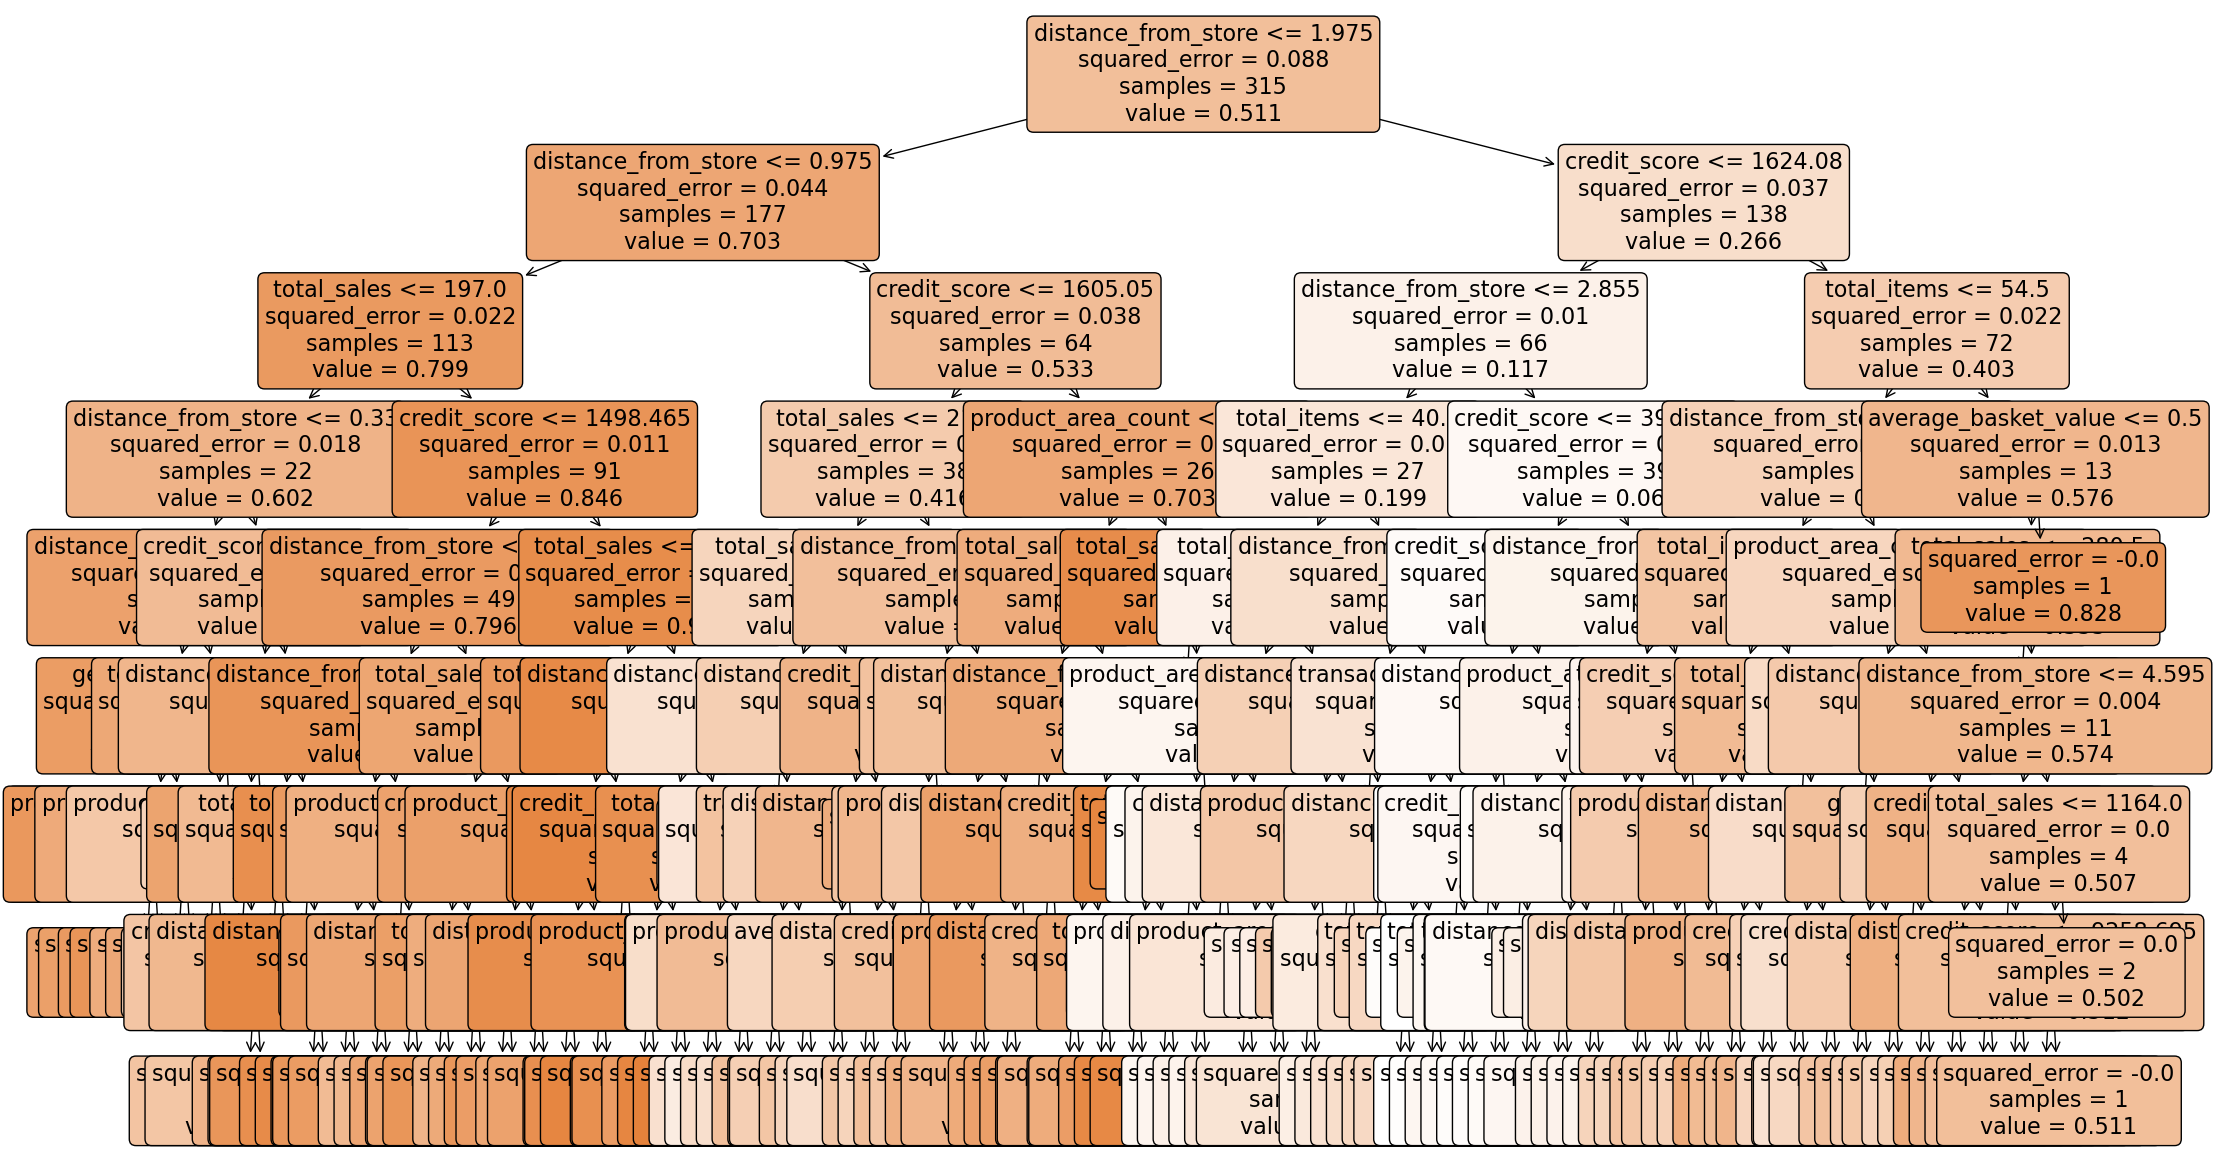

In [32]:
plt.figure(figsize=(25, 15))
tree = plot_tree(regressor,
                 feature_names=X.columns.tolist(),  # Convert Index to list
                 filled=True,
                 rounded=True,
                 fontsize=16)
plt.show()
